In [2]:
import numpy as np
import collections
import pandas as pd

from glob import glob

from seerdata import loadIncidenceFile, loadPopulationFile, random_subset


from datetime import datetime

def showtime():
    dt=datetime.now()
    print(dt.strftime("%D/%m/%Y %H:%M:%S"))


showtime()
path = 'incidence/yr2005.lo_2nd_half/BREAST.TXT'
incidences = glob('incidence/*/*.TXT')
path = incidences[0].replace('TXT', 'SUB')

random_subset(incidences[0], path)
#path = incidences[0]
#populationFiles = glob("populations/*/*/*.txt")

print("loading incidence files", path)
data=loadIncidenceFile(path)
print("loaded", len(data['Registry ID']), "records from", path)

#print("..loaded some table from seerdata..")
#print(data.keys())

#path='populations/expanded.race.by.hispanic/yr2005.lo_2nd_half/19agegroups.txt'
#print(path)
#pop = loadPopulationFile(path)
#print(pop.keys())

12/07/16/12/2016 09:47:09


loading incidence files incidence\yr1973_2013.seer9\BREAST.SUB


loaded 10000 records from incidence\yr1973_2013.seer9\BREAST.SUB


12/07/16/12/2016 09:47:18
average age at diagnosis 61.5377


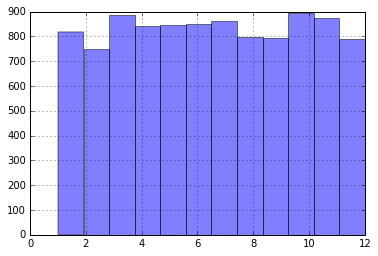

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

showtime()

plt.figure()
month=data['Month of diagnosis']
month.hist(alpha=0.5, bins=12)
"""
play with Kernels
see 
"""
print("average age at diagnosis",data['Age at diagnosis'].mean())

12/07/16/12/2016 09:47:26


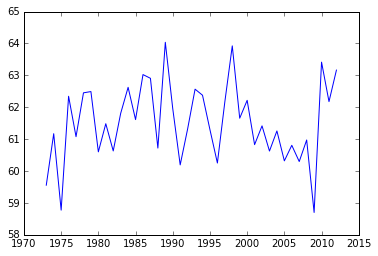

In [4]:
showtime()

series= [ [year, np.mean( data['Age at diagnosis'][data['Year of diagnosis'] == year])] for year in range(1973, 2013)]
series=np.array(series)

plt.figure()
plt.plot(series[:,0], series[:,1])

In [10]:
showtime()

validFields= []
for field in data.keys():
    try:
        Not_A_Number_Total=np.isnan(data[field]).sum()
        if Not_A_Number_Total>10:
            print(field, Not_A_Number_Total)
        else:
            print(".")
            validFields.append(field)
    except TypeError:
        print(field, "is not a numeric field check differently")
        validFields.append(field)

print(len(validFields), "fully documented fields:\n", validFields)

12/07/16/12/2016 09:50:32
.
.
.
.
.
.
.
.
.
.
.
Primary Site is not a numeric field check differently
.
.
.
.
.
.
.
.
EOD-Tumor Size 5671
EOD-Extension 5671
EOD-Extension Prost Path 10000
EOD-Lymph Node Involv 5671
Regional Nodes Positive 2281
Regional Nodes Examined 2281
EOD-Old 13 Digit is not a numeric field check differently
EOD-Old 2 Digit is not a numeric field check differently
EOD-Old 4 Digit 9051
Coding System for EOD 3390
Tumor Marker 1 3390
Tumor Marker 2 3390
Tumor Marker 3 3390
CS Tumor Size 6610
CS Extension 6610
CS Lymph Nodes 6610
CS Mets at Dx 6610
CS Site-Specific Factor 1 6610
CS Site-Specific Factor 2 6610
CS Site-Specific Factor 3 6610
CS Site-Specific Factor 4 6610
CS Site-Specific Factor 5 6610
CS Site-Specific Factor 6 6610
CS Site-Specific Factor 25 6610
Derived AJCC T 6610
Derived AJCC N 6610
Derived AJCC M 6610
Derived AJCC Stage Group 6610
Derived SS1977 6610
Derived SS2000 6610
Derived AJCC-Flag 6610
CS Version Input Original 6610
CS Version Derived 6610
CS

2016-12-06
==========

Directions to explore:
----------------------

+ Data cleanup: 

	Many fields are not complete for various reasons, do we try to complete them ? remove incomplete records ? split into sub datasets
 
+ exploratory datasets : 

	10k lines long snapshots of the files.

	done function random_subset

+ relapse:

	patients listed several times in a file ? across files ??

In [29]:
showtime()
number_of_fields = len(validFields)
otherFields=validFields.copy()
"""
BUG: seems there is a bug in pycharm handling of notebooks
the following snippet does not produce any output in pycharm but does produce
the expected result in the browser. 
guessing : too small buffer for the response from the kernel.

for i in range(number_of_fields):
    f1=validFields[i]
    for j in range(i+1, number_of_fields):
        f2=validField[j]
        print(f1,":", [f2])
"""

12/07/16/12/2016 11:13:10


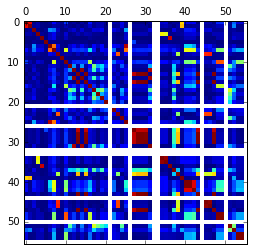

In [51]:
showtime()
import matplotlib.pyplot as plt
%matplotlib inline
data2= data.copy()
for f in data2.keys():
    if f not in validFields:
        del data2[f]
corr=data2.corr()
plt.matshow(corr.abs(),cmap=)